<a href="https://colab.research.google.com/github/sapsan14/ml-course-2026/blob/main/ex2/EX03_adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX03 - Доход взрослых


*   **Имя Notebook должно быть 'EX03_adults.ipynb'**
*   **Этот Notebook в режиме *readonly*, сделайте копию: File --> Save a copy in Drive, сделайте копию: File --> Save a copy in Drive**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## 1) Загрузка данных
Укажите путь к файлу `adult.data` и имена столбцов согласно исходному набору данных.

**Примечание по именам столбцов:**
Имена столбцов можно взять либо:
- с веб-сайта, откуда был загружен набор данных (например, UCI Machine Learning Repository),
- или из конца файла `adult.names`, который находится в той же папке.

В файле и на веб-сайте в некоторых названиях есть дефис (nt `education-num`, `marital-status`).
Поскольку в Python имена столбцов не могут содержать дефисы, их нужно заменить подчеркиваниями:
например `education-num` → `education_num`, `marital-status` → `marital_status`.

****Ваша задача:** заполните список `column_names` списком подходящих имен столбцов,
используя файл `adult.names` или информацию с веб-сайта.

****Проверка:**
- В наборе данных 15 столбцов.
- `df.head()` отображает ожидаемые столбцы и значения.
- *Подсказка:* kasuta `len(column_names)` ja `df.shape`.

In [19]:
if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = "/content/drive/MyDrive/google_colab/adult/adult.data" # muuda, kui fail asub mujal
else:
    file_path = "adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]


df_raw = pd.read_csv(file_path, names=column_names, sep=',', index_col=False, skipinitialspace=True)
df_raw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2) Обработка пропущенных значений
В некоторых категориальных столбцах есть пропущенные значения в виде `'?'`. Заменим их на `NaN`
и удалим строки с пропущенными значениями (простой первичный подход для исследовательского анализа).

**Sinu ülesanne:** удалить или обработать некорректные значения, чтобы анализ был надежным.

****Проверка:**
- `df.isna().sum()` после очистки возвращает везде 0.
- Сохраните количество строк до и после очистки в переменные (`rows_before` ja `rows_after`) и сравните их.

In [20]:
df_clean = df_raw.copy()
# Replace ? with NaN
df_clean.replace('?', np.nan, inplace=True)
# Drop NaNs
df_clean.dropna(inplace=True)
rows_before = df_raw.shape[0]
rows_after = df_clean.shape[0]
print(f"Rows before: {rows_before}, Rows after: {rows_after}")

Rows before: 32561, Rows after: 30162


## 3) Бинарная версия столбца дохода
Создаем `income_binary`:
- 1, если `income` >50K
- 0 в противном случае

**Sinu ülesanne:** создать новый столбец `income_binary` и проверить, что значения только 0/1.

****Проверка:**
- `'income_binary' in df.columns` on `True`.
- `set(df['income_binary'].unique())` ⊆ `{0, 1}`.

In [21]:
df_model = df_clean.copy()
# Create binary income: 1 if >50K, 0 otherwise
# Note: Data might have leading spaces, so strip
df_model['income_binary'] = (df_model['income'].str.strip() == '>50K').astype(int)
print(df_model['income_binary'].value_counts())

income_binary
0    22654
1     7508
Name: count, dtype: int64


## 4) Простые задачи анализа данных

В этой части вы попрактикуетесь в исследовании данных с помощью Pandas и сохраните результаты в переменные.

**Sinu ülesanne:** вычислите приведенные ниже значения и сохраните их в соответствующие переменные.

In [22]:
df_analysis = df_model.copy()

# 4.1 Number of females > 50K
female_over_50k = df_analysis[(df_analysis['sex'].str.strip() == 'Female') & (df_analysis['income_binary'] == 1)].shape[0]

# 4.2 Number of males > 50K
male_over_50k = df_analysis[(df_analysis['sex'].str.strip() == 'Male') & (df_analysis['income_binary'] == 1)].shape[0]

# 4.3 Total > 50K
total_over_50k = df_analysis[df_analysis['income_binary'] == 1].shape[0]

# 4.4 % females > 50K
females = df_analysis[df_analysis['sex'].str.strip() == 'Female']
female_over_50k_pct = (female_over_50k / len(females)) * 100 if len(females) > 0 else 0

# 4.5 % males > 50K
males = df_analysis[df_analysis['sex'].str.strip() == 'Male']
male_over_50k_pct = (male_over_50k / len(males)) * 100 if len(males) > 0 else 0

# 4.6 Avg age > 50K
avg_age_over_50k = df_analysis[df_analysis['income_binary'] == 1]['age'].mean()

# 4.7 Avg age <= 50K
avg_age_under_50k = df_analysis[df_analysis['income_binary'] == 0]['age'].mean()

# Kuvame tulemused
print(f"Female >50K: {female_over_50k}")
print(f"Male >50K: {male_over_50k}")
print(f"Total >50K: {total_over_50k}")
print(f"Female >50K %: {female_over_50k_pct:.2f}%")
print(f"Male >50K %: {male_over_50k_pct:.2f}%")
print(f"Avg age >50K: {avg_age_over_50k:.2f}")
print(f"Avg age <=50K: {avg_age_under_50k:.2f}")

Female >50K: 1112
Male >50K: 6396
Total >50K: 7508
Female >50K %: 11.37%
Male >50K %: 31.38%
Avg age >50K: 43.96
Avg age <=50K: 36.61


## 5) Визуализация

**Sinu ülesanne:**
- Постройте следующие графики kasutades seaborn ja matplotlib:
  1. Распределение возраста (гистограмма).
  2. Средние рабочие часы по профессиям (tulpdiagramm).
  3. Корреляционная матрица числовых признаков (sh `income_binary`) – soojuskaart.
  4. Распределение рабочих часов по полу (histogramm).
  5. Возраст по группам дохода (viiuldiagramm).

****Проверка:**
- У всех графиков есть заголовок и подписи осей.
- Матрица корреляции использует только подходящие числовые столбцы.
- *Подсказка:* при необходимости сделайте подписи категорий читаемыми `plt.xticks(rotation=45)`.

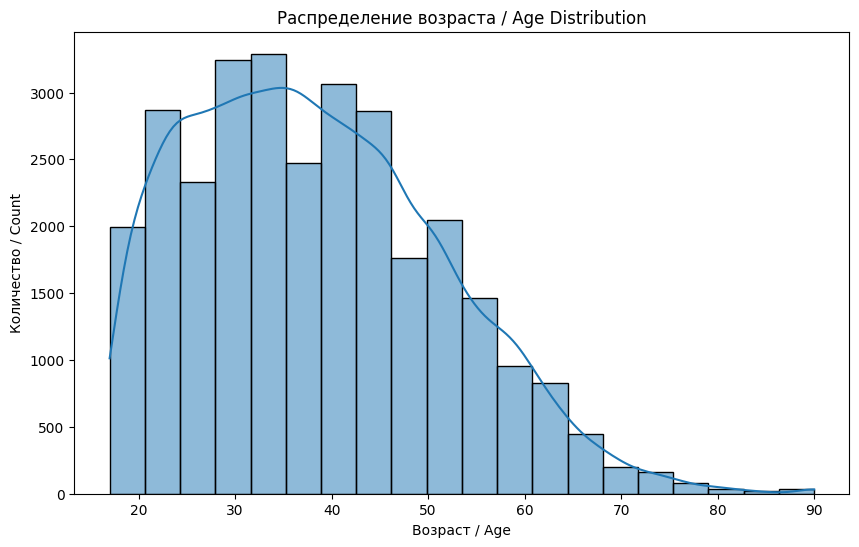

In [23]:
df_viz = df_analysis.copy()

# Vanuse jaotus (histogramm)
# Распределение возраста (гистограмма)
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['age'], bins=20, kde=True)
plt.title('Распределение возраста / Age Distribution')
plt.xlabel('Возраст / Age')
plt.ylabel('Количество / Count')
plt.show()

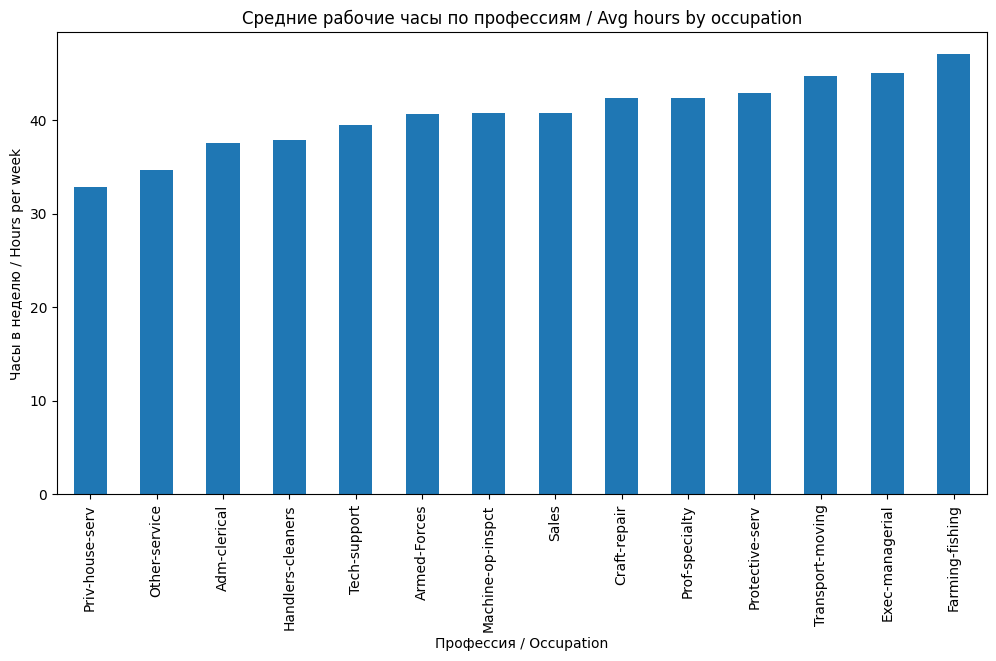

In [24]:
# Keskmised töötunnid ametite lõikes (tulpdiagramm)
# Средние рабочие часы по профессиям (столбчатая диаграмма)
plt.figure(figsize=(12, 6))
df_viz.groupby('occupation')['hours_per_week'].mean().sort_values().plot(kind='bar')
plt.title('Средние рабочие часы по профессиям / Avg hours by occupation')
plt.xlabel('Профессия / Occupation')
plt.ylabel('Часы в неделю / Hours per week')
plt.xticks(rotation=90)
plt.show()

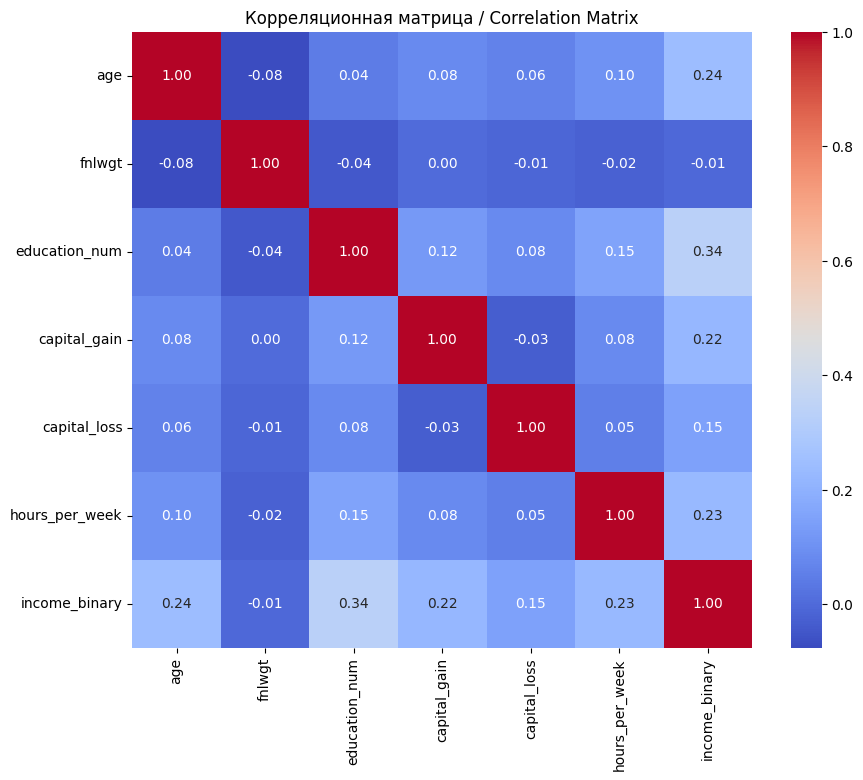

In [25]:
# Korrelatsioonid arvuliste tunnuste vahel (sh income_binary)
# Корреляции между числовыми признаками (включая income_binary)
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df_viz.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица / Correlation Matrix')
plt.show()

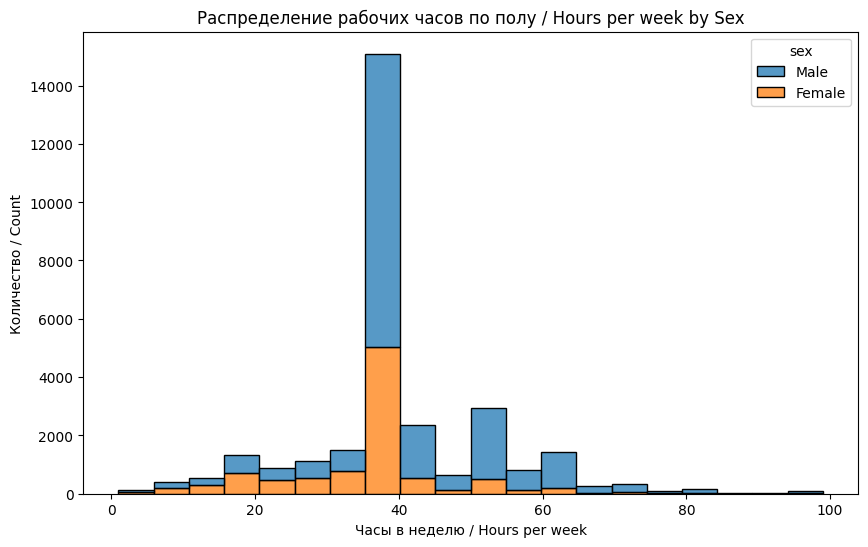

In [26]:
# Töötundide jaotus soo lõikes
# Распределение рабочих часов по полу
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz, x='hours_per_week', hue='sex', multiple='stack', bins=20)
plt.title('Распределение рабочих часов по полу / Hours per week by Sex')
plt.xlabel('Часы в неделю / Hours per week')
plt.ylabel('Количество / Count')
plt.show()

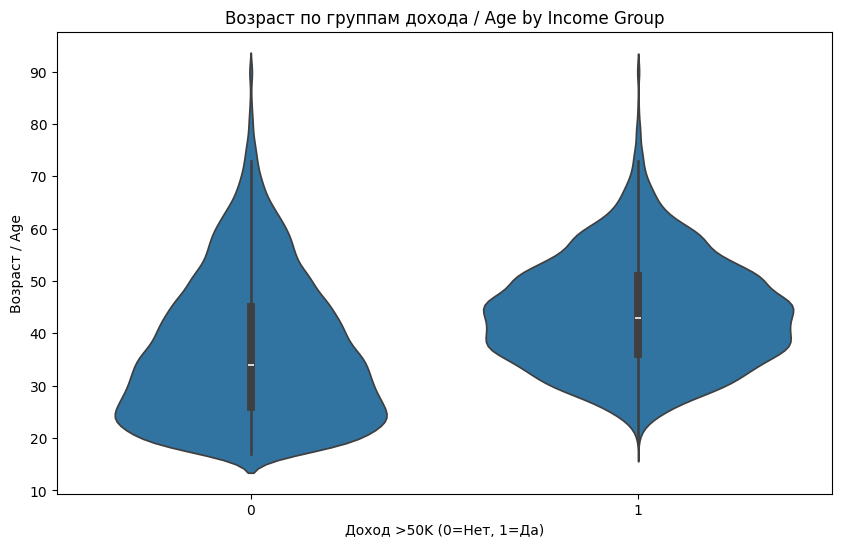

In [27]:
# Vanus tulugruppide lõikes (viiuldiagramm) - kasuta `income_binary`
# Возраст по группам дохода
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_viz, x='income_binary', y='age')
plt.title('Возраст по группам дохода / Age by Income Group')
plt.xlabel('Доход >50K (0=Нет, 1=Да)')
plt.ylabel('Возраст / Age')
plt.show()

## 6) Сохраните таблицу обратно в CSV

В качестве последнего шага сохраняем очищенный и обработанный набор данных в CSV-файл.

In [29]:
if "google.colab" in sys.modules:
    path = "/content/drive/MyDrive/google_colab/adults_cleaned.csv" # muuda, kui soovid faili salvestada muusse asukohta
else:
    path = "adults_cleaned.csv"

df_viz.to_csv(path, index=False)